In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## ВАРИАНТ 3

# Задание №2

In [2]:
x = np.array([
	[-4, -2],
	[2, 0],
	[0, 1],
	[2, 1],
])
x

array([[-4, -2],
       [ 2,  0],
       [ 0,  1],
       [ 2,  1]])

In [3]:
y = np.array([
	[0],
	[3],
	[6],
	[8]
])
y

array([[0],
       [3],
       [6],
       [8]])

In [4]:
k0, k1, k2, x1, x2, y_ = sp.symbols("k0 k1 k2 x1 x2 y")
print(k0, k1, k2, x1, x2)

k0 k1 k2 x1 x2


In [5]:
f = k0 + k1 * x1 + k2 * x2
f

k0 + k1*x1 + k2*x2

In [6]:
f_y = (y_ - f) ** 2
f_y

(-k0 - k1*x1 - k2*x2 + y)**2

In [7]:
funcs = []
for p in [k0, k1, k2]:
	
	total = 0
	for i, data in enumerate(x):
		data = np.append(data, y[i])
		f_y_curr = f_y.subs(dict(zip([x1, x2, y_], data)))
		total += f_y_curr.diff(p)
	
	funcs += [total]

funcs

[8*k0 - 34, 48*k1 + 20*k2 - 44, 20*k1 + 12*k2 - 28]

In [8]:
total_solve = {str(k): v for k, v in sp.solve(funcs).items()}
total_solve

{'k0': 17/4, 'k1': -2/11, 'k2': 29/11}

In [9]:
def f(x, k0, k1, k2):
	return k0 + k1 * x + k2 * x

In [10]:
x_data = np.linspace(-5, 3, 100)
y_data = f(x_data, **total_solve,)

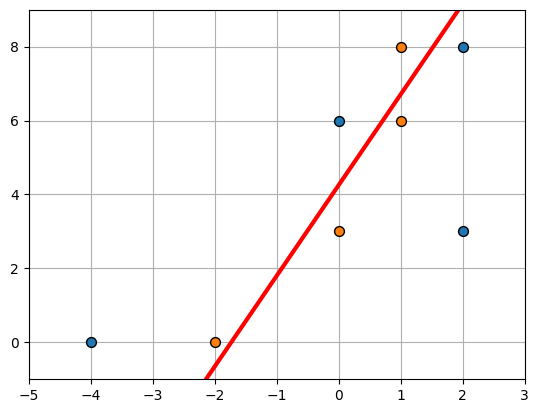

In [11]:
plt.scatter(x[:, 0], y, s=50, ec="black", zorder=3)
plt.scatter(x[:, 1], y, s=50, ec="black", zorder=3)
plt.plot(x_data, y_data, "r", lw=3)
plt.xlim(-5, 3)
plt.ylim(-1, 9)
plt.grid()
plt.show()

$$f(x) = k_0 + k_1x_1 + k_2x_2\space-> xk = y\space-> x^Txk = x^Ty$$

In [12]:
x = np.array([
	[1, -4, -2],
	[1, 2, 0],
	[1, 0, 1],
	[1, 2, 1],
])
x

array([[ 1, -4, -2],
       [ 1,  2,  0],
       [ 1,  0,  1],
       [ 1,  2,  1]])

In [13]:
xTx = x.T @ x
xTx

array([[ 4,  0,  0],
       [ 0, 24, 10],
       [ 0, 10,  6]])

In [14]:
xTy = x.T @ y
xTy

array([[17],
       [22],
       [14]])

In [15]:
k = np.linalg.solve(xTx, xTy)
k

array([[ 4.25      ],
       [-0.18181818],
       [ 2.63636364]])

## Задание №3

In [16]:
x_data = np.array([2, 6, 5])
y_data = np.array([5, 3, 6])
const_m = np.array([[1, 0, 0], [-3, 4, -1], [2, -4, 2]])

In [17]:
x_data_interpolation = const_m @ x_data
x_data_interpolation

array([  2,  13, -10])

In [18]:
y_data_interpolation = const_m @ y_data
y_data_interpolation

array([ 5, -9, 10])

In [19]:
t = np.linspace(-10, 10, 1000)
x = x_data_interpolation[0] + x_data_interpolation[1] * t + x_data_interpolation[2] * t ** 2
y = y_data_interpolation[0] + y_data_interpolation[1] * t + y_data_interpolation[2] * t ** 2

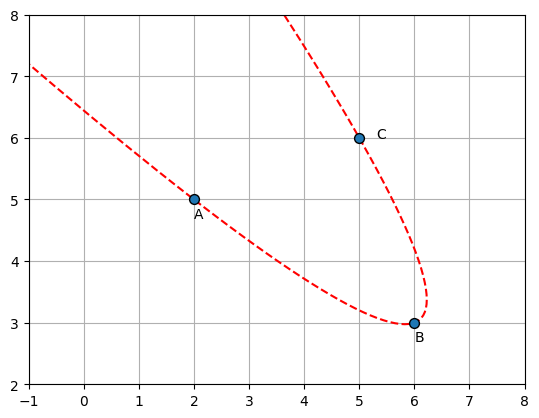

In [20]:
plt.scatter(x_data, y_data, s=50, ec="black", zorder=3)
plt.plot(x, y, "r--")
plt.xlim((-1, 8))
plt.ylim((2, 8))
plt.annotate("A", xy=(2, 5), xytext=(2, 4.7))
plt.annotate("B", xy=(6, 3), xytext=(6, 2.7))
plt.annotate("C", xy=(5, 6), xytext=(5.3, 6))
plt.grid()